In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_regression,make_blobs
import tensorflow as tf

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

the shape of the inputs x is: (100, 1)
the shape of the targets y is: (100, 1)


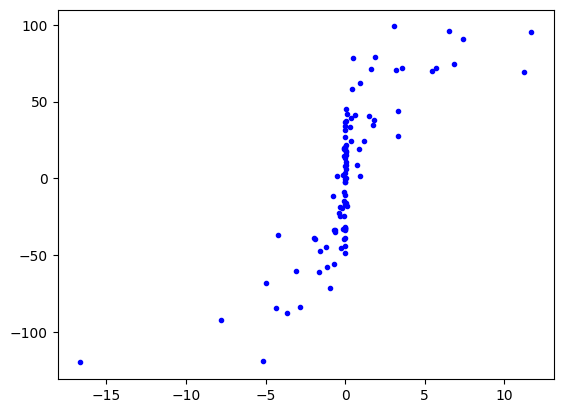

In [2]:
x,y=make_regression(n_samples=100, n_features=1, noise=20.0, random_state=0)
x=x**3
# Convert 1-D arrays into 2-D because the commands later will require it
#x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

plt.plot(x,y,'b.')

In [3]:
"""Split the dataset into training, cross validation, and test sets¶
In previous labs, you might have used the entire dataset to train your models. In practice however, it is best to hold out a portion of your data to measure how well
your model generalizes to new examples. This will let you know if the model has overfit to your training set.

As mentioned in the lecture, it is common to split your data into three parts:

training set - used to train the model
cross validation set (also called validation, development, or dev set) - used to evaluate the different model configurations you are choosing from. For example,
you can use this to make a decision on what polynomial features to add to your dataset.
test set - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions
 while you are still developing the models.
Scikit-learn provides a train_test_split function to split your data into the parts mentioned above. In the code cell below, you will split the entire dataset
into 60% training, 20% cross validation, and 20% test."""

"Split the dataset into training, cross validation, and test sets¶\nIn previous labs, you might have used the entire dataset to train your models. In practice however, it is best to hold out a portion of your data to measure how well \nyour model generalizes to new examples. This will let you know if the model has overfit to your training set.\n\nAs mentioned in the lecture, it is common to split your data into three parts:\n\ntraining set - used to train the model\ncross validation set (also called validation, development, or dev set) - used to evaluate the different model configurations you are choosing from. For example, \nyou can use this to make a decision on what polynomial features to add to your dataset.\ntest set - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions\n while you are still developing the models.\nScikit-learn provides a train_test_split function to split your data into the parts mentione

In [4]:
# 60% of the dataset as the training set.remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60, 1)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20, 1)

the shape of the test set (input) is: (20, 1)
the shape of the test set (target) is: (20, 1)


In [5]:
"""Feature scaling
In the previous course of this specialization, you saw that it is usually a good idea to perform feature scaling to help your model converge faster. This is especially true if your input features have widely different ranges of values.
Later in this lab, you will be adding polynomial terms so your input features will indeed have different ranges. For example,  𝑥
  runs from around 1600 to 3600, while  𝑥2
  will run from 2.56 million to 12.96 million.

You will only use  𝑥
  for this first model but it's good to practice feature scaling now so you can apply it later. For that, you will use the StandardScaler class from scikit-learn.
   This computes the z-score of your inputs. As a refresher, the z-score is given by the equation:

𝑧=𝑥−𝜇𝜎

where  𝜇
  is the mean of the feature values and  𝜎
  is the standard deviation. The code below shows how to prepare the training set using the said class. You can plot the results again to inspect if it still
  follows the same pattern as before. The new graph should have a reduced range of values for x."""

"Feature scaling\nIn the previous course of this specialization, you saw that it is usually a good idea to perform feature scaling to help your model converge faster. This is especially true if your input features have widely different ranges of values. \nLater in this lab, you will be adding polynomial terms so your input features will indeed have different ranges. For example,  𝑥\n  runs from around 1600 to 3600, while  𝑥2\n  will run from 2.56 million to 12.96 million.\n\nYou will only use  𝑥\n  for this first model but it's good to practice feature scaling now so you can apply it later. For that, you will use the StandardScaler class from scikit-learn.\n   This computes the z-score of your inputs. As a refresher, the z-score is given by the equation:\n\n𝑧=𝑥−𝜇𝜎\n \nwhere  𝜇\n  is the mean of the feature values and  𝜎\n  is the standard deviation. The code below shows how to prepare the training set using the said class. You can plot the results again to inspect if it still \n  follo

mean of the training set: -0.00
standard deviation of the training set: 3.77


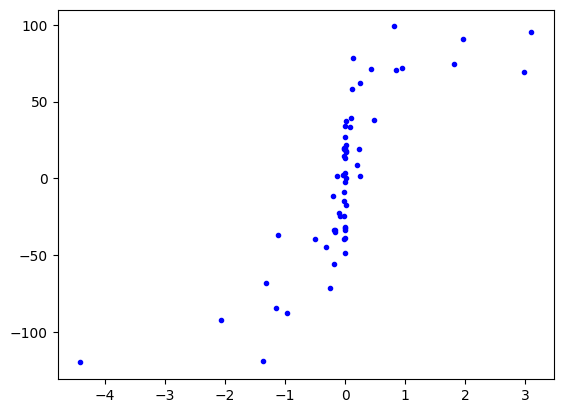

In [6]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
#scaler_linear.fit(x_train)  dont use this as using fit_tranform, if used transform then do first fit then tranform
X_train_scaled = scaler_linear.fit_transform(x_train)

#scaler_linear.fit(y_train)
#y_train_scaled = scaler_linear.fit_transform(y_train)  # idont understand why are we not scaling y
#y_cv_scaled = scaler_linear.transform(y_cv)
#y_test_scaled = scaler_linear.transform(y_test)

print(f"mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
plt.plot(X_train_scaled,y_train,'b.')

In [7]:
"""Train the model
Next, you will create and train a regression model.
For this lab, you will use the LinearRegression class but take note that there are other
https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors
 which you can also use."""

'Train the model\nNext, you will create and train a regression model. \nFor this lab, you will use the LinearRegression class but take note that there are other \nhttps://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors\n which you can also use.'

In [8]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

In [9]:
"""Evaluate the Model
To evaluate the performance of your model, you will measure the error for the training and cross validation sets. For the training error,
recall the equation for calculating the mean squared error (MSE):

𝐽𝑡𝑟𝑎𝑖𝑛(𝑤⃗ ,𝑏)=12𝑚𝑡𝑟𝑎𝑖𝑛[∑𝑖=1𝑚𝑡𝑟𝑎𝑖𝑛(𝑓𝑤⃗ ,𝑏(𝑥⃗ (𝑖)𝑡𝑟𝑎𝑖𝑛)−𝑦(𝑖)𝑡𝑟𝑎𝑖𝑛)2]

Scikit-learn also has a built-in mean_squared_error() function that you can use. Take note though that as per the documentation, scikit-learn's
 implementation only divides by m and not 2*m, where m is the number of examples. As mentioned in Course 1 of this Specialization (cost function lectures),
 dividing by 2m is a convention we will follow but the calculations should still work whether or not you include it. Thus, to match the equation above, you can
  use the scikit-learn function then divide by 2 as shown below. We also included a for-loop implementation so you can check that it's equal.

Another thing to take note: Since you trained the model on scaled values (i.e. using the z-score), you should also feed in the scaled training set instead of its raw values."""

"Evaluate the Model\nTo evaluate the performance of your model, you will measure the error for the training and cross validation sets. For the training error, \nrecall the equation for calculating the mean squared error (MSE):\n\n𝐽𝑡𝑟𝑎𝑖𝑛(𝑤⃗ ,𝑏)=12𝑚𝑡𝑟𝑎𝑖𝑛[∑𝑖=1𝑚𝑡𝑟𝑎𝑖𝑛(𝑓𝑤⃗ ,𝑏(𝑥⃗ (𝑖)𝑡𝑟𝑎𝑖𝑛)−𝑦(𝑖)𝑡𝑟𝑎𝑖𝑛)2]\n \nScikit-learn also has a built-in mean_squared_error() function that you can use. Take note though that as per the documentation, scikit-learn's\n implementation only divides by m and not 2*m, where m is the number of examples. As mentioned in Course 1 of this Specialization (cost function lectures), \n dividing by 2m is a convention we will follow but the calculations should still work whether or not you include it. Thus, to match the equation above, you can\n  use the scikit-learn function then divide by 2 as shown below. We also included a for-loop implementation so you can check that it's equal.\n\nAnother thing to take note: Since you trained the model on scaled values (i.e. using the z

In [10]:
# the scaled training set use
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 538.5537651251735
training MSE (for-loop implementation): 538.5537651251735


In [11]:
"""You can then compute the MSE for the cross validation set with basically the same equation:

𝐽𝑐𝑣(𝑤⃗ ,𝑏)=12𝑚𝑐𝑣[∑𝑖=1𝑚𝑐𝑣(𝑓𝑤⃗ ,𝑏(𝑥⃗ (𝑖)𝑐𝑣)−𝑦(𝑖)𝑐𝑣)2]

As with the training set, you will also want to scale the cross validation set. An important thing to note when using the z-score is
 you have to use the mean and standard deviation of the training set when scaling the cross validation set. This is to ensure that your
  input features are transformed as expected by the model. One way to gain intuition is with this scenario:

Say that your training set has an input feature equal to 500 which is scaled down to 0.5 using the z-score.
After training, your model is able to accurately map this scaled input x=0.5 to the target output y=300.
Now let's say that you deployed this model and one of your users fed it a sample equal to 500.
If you get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to 0.5 and
 your model will most likely make a wrong prediction (i.e. not equal to y=300).
You will scale the cross validation set below by using the same StandardScaler you used earlier but only calling its transform() method instead of fit_transform()."""

"You can then compute the MSE for the cross validation set with basically the same equation:\n\n𝐽𝑐𝑣(𝑤⃗ ,𝑏)=12𝑚𝑐𝑣[∑𝑖=1𝑚𝑐𝑣(𝑓𝑤⃗ ,𝑏(𝑥⃗ (𝑖)𝑐𝑣)−𝑦(𝑖)𝑐𝑣)2]\n \nAs with the training set, you will also want to scale the cross validation set. An important thing to note when using the z-score is\n you have to use the mean and standard deviation of the training set when scaling the cross validation set. This is to ensure that your\n  input features are transformed as expected by the model. One way to gain intuition is with this scenario:\n\nSay that your training set has an input feature equal to 500 which is scaled down to 0.5 using the z-score.\nAfter training, your model is able to accurately map this scaled input x=0.5 to the target output y=300.\nNow let's say that you deployed this model and one of your users fed it a sample equal to 500.\nIf you get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to 0.5 and\n your model will 

In [12]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv) # donot use fit_transform beacuse mean and std should be of x_train not of x_cv

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: -0.00
Standard deviation used to scale the CV set: 3.77
Cross validation MSE: 278.8743938637911


In [13]:
"""Adding Polynomial Features
From the graphs earlier, you may have noticed that the target y rises more sharply at smaller values of x compared to higher ones.
 A straight line might not be the best choice because the target y seems to flatten out as x increases. Now that you have these values
 of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance.
 The code will mostly be the same but with a few extra preprocessing steps. Let's see that below."""

"Adding Polynomial Features\nFrom the graphs earlier, you may have noticed that the target y rises more sharply at smaller values of x compared to higher ones.\n A straight line might not be the best choice because the target y seems to flatten out as x increases. Now that you have these values \n of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance. \n The code will mostly be the same but with a few extra preprocessing steps. Let's see that below."

In [14]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[-0.06  0.  ]
 [ 0.73  0.53]
 [ 0.86  0.74]
 [ 1.64  2.68]
 [-1.23  1.51]]


In [15]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[-0.01 -0.33]
 [ 0.19 -0.32]
 [ 0.23 -0.31]
 [ 0.43 -0.27]
 [-0.32 -0.3 ]]


In [16]:
"""You can then proceed to train the model. After that, you will measure the model's performance against the cross validation set. Like before,
 you should make sure to perform the same transformations as you did in the training set. You will add the same number of polynomial features then scale the range of values."""

"You can then proceed to train the model. After that, you will measure the model's performance against the cross validation set. Like before,\n you should make sure to perform the same transformations as you did in the training set. You will add the same number of polynomial features then scale the range of values."

In [17]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 537.0759771343098
Cross validation MSE: 276.6210597815964


In [18]:
"""You'll notice that the MSEs are significantly better for both the training and cross validation set when you added the 2nd order polynomial.
 You may want to introduce more polynomial terms and see which one gives the best performance. As shown in class, you can have 10 different models like this:


You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to
 degree=10. We'll plot it at the end to make it easier to compare the results for each model."""

"You'll notice that the MSEs are significantly better for both the training and cross validation set when you added the 2nd order polynomial.\n You may want to introduce more polynomial terms and see which one gives the best performance. As shown in class, you can have 10 different models like this:\n\n\nYou can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to\n degree=10. We'll plot it at the end to make it easier to compare the results for each model."

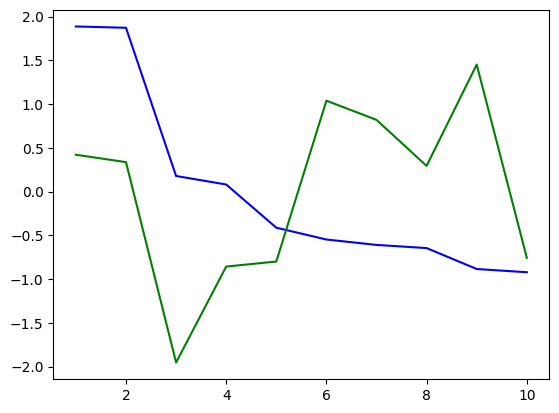

In [19]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

# Plot the results
degrees=np.array(range(1,11))
# i did scaling to plot it the right way
scale_mses=StandardScaler()
train_mses_s=scale_mses.fit_transform(np.array(train_mses).reshape(-1,1))
cv_mses_s=scale_mses.fit_transform(np.array(cv_mses).reshape(-1,1))
plt.plot(degrees,train_mses_s,'b-')
plt.plot(degrees,cv_mses_s,'g-')

In [20]:
t=np.arange(1,5).reshape(-1,1)
poly=PolynomialFeatures(4,include_bias=False)
temp=poly.fit_transform(t)
temp

array([[  1.,   1.,   1.,   1.],
       [  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.]])

In [21]:
"""Choosing the best model
When selecting a model, you want to choose one that performs well both on the training and cross validation set.
It implies that it is able to learn the patterns from your training set without overfitting. If you used the defaults in this lab,
you will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5.
After that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model
with the lowest cv_mse as the one best suited for your application."""

'Choosing the best model\nWhen selecting a model, you want to choose one that performs well both on the training and cross validation set. \nIt implies that it is able to learn the patterns from your training set without overfitting. If you used the defaults in this lab, \nyou will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5. \nAfter that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model \nwith the lowest cv_mse as the one best suited for your application.'

In [22]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses_s) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=3


In [23]:
#You can then publish the generalization error by computing the test set's MSE.
#As usual, you should transform this data the same way you did with the training and cross validation sets

# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)  #thats why we stored scaler in list because that scaler can be used only

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)  # and model also we stored
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 368.13
Cross Validation MSE: 215.56
Test MSE: 373.86


In [24]:
# but train mse is larger than cv and test that means model is underfit (have high bias)
# so i need to figure it out

In [25]:
#Neural Networks
#The same model selection process can also be used when choosing between different neural network architectures.

In [26]:
"""Prepare the Data¶
You will use the same training, cross validation, and test sets you generated in the previous section.
From earlier lectures in this course, you may have known that neural networks can learn non-linear relationships so you can
opt to skip adding polynomial features. The code is still included below in case you want to try later and see what effect
it will have on your results. The default degree is set to 1 to indicate that it will just use x_train, x_cv, and x_test as
is (i.e. without any additional polynomial features)."""

'Prepare the Data¶\nYou will use the same training, cross validation, and test sets you generated in the previous section. \nFrom earlier lectures in this course, you may have known that neural networks can learn non-linear relationships so you can \nopt to skip adding polynomial features. The code is still included below in case you want to try later and see what effect \nit will have on your results. The default degree is set to 1 to indicate that it will just use x_train, x_cv, and x_test as \nis (i.e. without any additional polynomial features).'

In [27]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [28]:
"""Next, you will scale the input features to help gradient descent converge faster. Again,
notice that you are using the mean and standard deviation computed from the training set by just using transform() in the cross validation
and test sets instead of fit_transform()."""

'Next, you will scale the input features to help gradient descent converge faster. Again, \nnotice that you are using the mean and standard deviation computed from the training set by just using transform() in the cross validation \nand test sets instead of fit_transform().'

In [29]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

In [30]:
"""Build and train the models
You will then create the neural network architectures shown earlier. The code is provided in the build_models() function in the utils.py
 file in case you want to inspect or modify it. You will use that in the loop below then proceed to train the models. For each model, you will
  also record the training and cross validation errors."""

'Build and train the models\nYou will then create the neural network architectures shown earlier. The code is provided in the build_models() function in the utils.py\n file in case you want to inspect or modify it. You will use that in the loop below then proceed to train the models. For each model, you will\n  also record the training and cross validation errors.'

In [31]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
model1 = Sequential(
    [
        tf.keras.Input(shape=(1,)),
        Dense(25, activation='relu', name = 'layer1'),
        Dense(15, activation='relu', name = 'layer2'),
        Dense(1, activation='linear', name = 'layer3')
     ]
)
model2 = Sequential(
    [
        tf.keras.Input(shape=(1,)),
        Dense(20, activation='relu', name = 'layer1'),
        Dense(12, activation='relu', name = 'layer2'),
        Dense(12, activation='relu', name = 'layer3'),
        Dense(20, activation='relu', name = 'layer4'),
        Dense(1, activation='linear', name = 'layer5')
     ]
)
model3 = Sequential(
    [
        tf.keras.Input(shape=(1,)),
        Dense(32, activation='relu', name = 'layer1'),
        Dense(16, activation='relu', name = 'layer2'),
        Dense(8, activation='relu', name = 'layer3'),
        Dense(4, activation='relu', name = 'layer4'),
        Dense(12, activation='relu', name = 'layer5'),
        Dense(1, activation='linear', name = 'layer6')
     ]
)


nn_models = [model1,model2,model3]

# Loop over the the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0 # don't know what it is
    )

    print("Done!\n")


    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)


# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training sequential...
Done!

1/1 [==============================] - 0s 21ms/step
Training sequential_1...
Done!

1/1 [==============================] - 0s 30ms/step
Training sequential_2...
Done!

1/1 [==============================] - 0s 36ms/step
RESULTS:
Model 1: Training MSE: 227.81, CV MSE: 234.61
Model 2: Training MSE: 248.86, CV MSE: 246.97
Model 3: Training MSE: 254.51, CV MSE: 222.27


In [32]:
#From the recorded errors, you can decide which is the best model for your application. Look at the results above and see if you agree with the selected model_num below.
#Finally, you will compute the test error to estimate how well it generalizes to new examples.

In [33]:
# Select the model with the lowest CV MSE
model_num = 1

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 [==============================] - 0s 31ms/step
Selected Model: 1
Training MSE: 227.81
Cross Validation MSE: 234.61
Test MSE: 262.76


the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


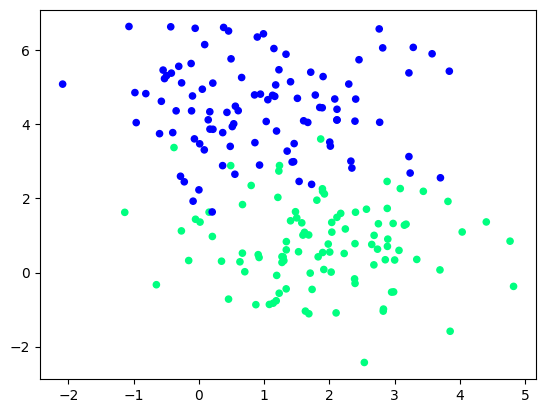

In [34]:
#Classification
#In this last part of the lab, you will practice model evaluation and selection on a classification task.
#The process will be similar, with the main difference being the computation of the errors. You will see that in the following sections.

x_bc,y_bc=make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.2, random_state=0)



# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

plt.scatter(x_bc[:, 0], x_bc[:, 1], c=y_bc, s=20, cmap='winter')

In [35]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [36]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

In [37]:
""""Evaluating the error for classification models
In the previous sections on regression models, you used the mean squared error to measure how well your model is doing.
 For classification, you can get a similar metric by getting the fraction of the data that the model has misclassified.
 For example, if your model made wrong predictions for 2 samples out of 5, then you will report an error of 40% or 0.4.
 The code below demonstrates this using a for-loop and also with Numpy's mean() function."""

'"Evaluating the error for classification models\nIn the previous sections on regression models, you used the mean squared error to measure how well your model is doing.\n For classification, you can get a similar metric by getting the fraction of the data that the model has misclassified. \n For example, if your model made wrong predictions for 2 samples out of 5, then you will report an error of 40% or 0.4. \n The code below demonstrates this using a for-loop and also with Numpy\'s mean() function.'

In [38]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each prediction
for i in range(num_predictions):

    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:

        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [40]:
"""Build and train the model
You will use the same neural network architectures in the previous section so you can call the build_models() function again to create new instances of these models.

You will follow the recommended approach mentioned last week where you use a linear activation for the output layer (instead of sigmoid)
then set from_logits=True when declaring the loss function of the model. You will use the binary crossentropy loss because this is a binary classification problem.

After training, you will use a sigmoid function to convert the model outputs into probabilities. From there, you can set a threshold and get
 the fraction of misclassified examples from the training and cross validation sets."""

'Build and train the model\nYou will use the same neural network architectures in the previous section so you can call the build_models() function again to create new instances of these models.\n\nYou will follow the recommended approach mentioned last week where you use a linear activation for the output layer (instead of sigmoid) \nthen set from_logits=True when declaring the loss function of the model. You will use the binary crossentropy loss because this is a binary classification problem.\n\nAfter training, you will use a sigmoid function to convert the model outputs into probabilities. From there, you can set a threshold and get\n the fraction of misclassified examples from the training and cross validation sets.'

In [44]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
model1 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(25, activation='relu', name = 'layer1'),
        Dense(15, activation='relu', name = 'layer2'),
        Dense(1, activation='linear', name = 'layer3')
     ]
)
model2 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(20, activation='relu', name = 'layer1'),
        Dense(12, activation='relu', name = 'layer2'),
        Dense(12, activation='relu', name = 'layer3'),
        Dense(20, activation='relu', name = 'layer4'),
        Dense(1, activation='linear', name = 'layer5')
     ]
)
model3 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(32, activation='relu', name = 'layer1'),
        Dense(16, activation='relu', name = 'layer2'),
        Dense(8, activation='relu', name = 'layer3'),
        Dense(4, activation='relu', name = 'layer4'),
        Dense(12, activation='relu', name = 'layer5'),
        Dense(1, activation='linear', name = 'layer6')
     ]
)

models_bc=[model1,model2,model3]

# Loop over each model
for model in models_bc:

    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )

    print("Done!\n")

    # Set the threshold for classification
    threshold = 0.5

    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training sequential_12...
Done!

2/2 [==============================] - 0s 6ms/step
Training sequential_13...
Done!

2/2 [==============================] - 0s 6ms/step
Training sequential_14...
Done!

2/2 [==============================] - 0s 4ms/step
Model 1: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.15000
Model 2: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.12500
Model 3: Training Set Classification Error: 0.01667, CV Set Classification Error: 0.15000


In [45]:
#From the output above, you can choose which one performed best. If there is a tie on the cross validation set error,
#then you can pick the one with the lower training set error. Finally, you can compute the test error to report the model's generalization error.

In [46]:
# Select the model with the lowest error
model_num = 1

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 11ms/step
Selected Model: 1
Training Set Classification Error: 0.0000
CV Set Classification Error: 0.1500
Test Set Classification Error: 0.0750
